<a href="https://colab.research.google.com/github/yamaguchinorimitsu/ajax_app/blob/master/%E7%B7%B4%E7%BF%92%EF%BC%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

# CSVファイルを読み込み
df = pd.read_csv('/content/Boston.csv')

df.head()

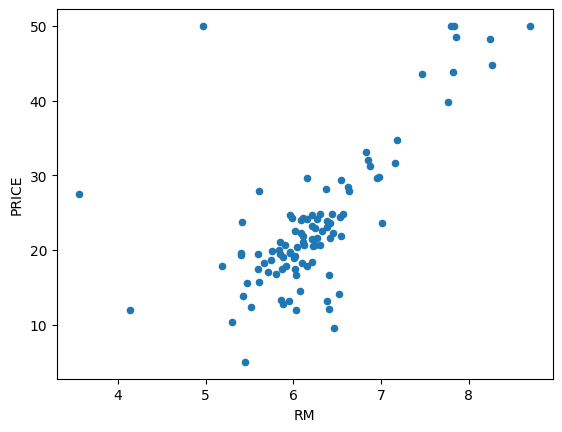

In [2]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='RM', y='PRICE')



plt.show()

In [3]:
# 外れ値データを作成
no = df[(df['RM'] < 6) & (df['PRICE'] > 40)].index
no

Int64Index([76], dtype='int64')

In [4]:
#外れ値を削除
df2 = df.drop(no,axis=0)

In [5]:
# ダミー変数への変換
crime = pd.get_dummies(df2['CRIME'], prefix='crime', drop_first=True)

# 元のデータフレームとダミー変数を横方向に連結
df3 = pd.concat([df2, crime], axis=1)

df4 = df3.drop(['CRIME'], axis = 1)


# 連結結果の表示
print(df4)

      ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD  TAX  PTRATIO  \
0    0.0  18.10     0  0.718  3.561   87.9  1.6132  24.0  666     20.2   
1    0.0   8.14     0  0.538  5.950   82.0  3.9900   4.0  307     21.0   
2   82.5   2.03     0  0.415  6.162   38.4  6.2700   2.0  348     14.7   
3    0.0  21.89     0  0.624  6.151   97.9  1.6687   4.0  437     21.2   
4    0.0  18.10     0  0.614  6.980   67.6  2.5329  24.0  666     20.2   
..   ...    ...   ...    ...    ...    ...     ...   ...  ...      ...   
95   0.0  18.10     0  0.740  6.219  100.0  2.0048  24.0  666     20.2   
96   0.0  18.10     0  0.655  5.759   48.2  3.0665  24.0  666     20.2   
97   0.0  18.10     0  0.671  6.380   96.2  1.3861  24.0  666     20.2   
98   0.0   9.90     0  0.544  5.914   83.2  3.9986   4.0  304     18.4   
99   0.0  18.10     0  0.693  5.453  100.0  1.4896  24.0  666     20.2   

         B  LSTAT  PRICE  crime_low  crime_very_low  
0   354.70   7.12   27.5          0               0  
1  

In [6]:
# 各列とPRICE列を見る
correlation = df4.corr()['PRICE'].abs()

print(correlation)

ZN                0.215161
INDUS             0.452805
CHAS              0.126303
NOX               0.322626
RM                0.774697
AGE               0.311111
DIS               0.075576
RAD               0.315146
TAX               0.406272
PTRATIO           0.500183
B                 0.266087
LSTAT             0.682172
PRICE             1.000000
crime_low         0.144953
crime_very_low    0.193203
Name: PRICE, dtype: float64


In [7]:
# 降順に並び替え
sorted_train_col = correlation.sort_values(ascending=False)
sorted_train_col

PRICE             1.000000
RM                0.774697
LSTAT             0.682172
PTRATIO           0.500183
INDUS             0.452805
TAX               0.406272
NOX               0.322626
RAD               0.315146
AGE               0.311111
B                 0.266087
ZN                0.215161
crime_very_low    0.193203
crime_low         0.144953
CHAS              0.126303
DIS               0.075576
Name: PRICE, dtype: float64

In [8]:
# 特徴量とターゲットの分割
X = df4.loc[:,['RM','PTRATIO','LSTAT']]
y = df4[['PRICE']]

# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [9]:
from sklearn.preprocessing import StandardScaler

# StandardScalerのインスタンスを作成
scaler = StandardScaler()
# 訓練データを用いて平均と標準偏差を計算し、スケーリングに使用する
scaler.fit(X_train)
# 訓練データを標準化
X_train_scaled = scaler.transform(X_train)
# テストデータも同じスケーリングを適用
X_test_scaled = scaler.transform(X_test)


# scaler2 = StandardScaler()
# # 訓練データを用いて平均と標準偏差を計算し、スケーリングに使用する
# scaler2.fit(y_train)
# # 訓練データを標準化
# y_train_scaled = scaler2.transform(y_train)
# # テストデータも同じスケーリングを適用
# y_test_scaled = scaler2.transform(y_test)

In [10]:
# 線形回帰モデルの作成と評価
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print(model.score(X_train_scaled,y_train))

model.score(X_test_scaled,y_test )


0.7073716769501904


0.7681736896044917

In [11]:
# リッジ回帰モデルの作成と評価
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

regressor_ridge = Ridge(alpha=1)
regressor_ridge.fit(X_train_scaled,y_train )


Ridge(alpha=1)

In [12]:
regressor_ridge.score(X_train_scaled,y_train )

0.7073369929932063

In [13]:
regressor_ridge.score(X_test_scaled,y_test )

0.767259624564456

In [14]:
maxScore = 0
maxIndex = 0
# range関数により整数列を1～2000生成
for i in range(1, 2000):
    num = i/100
    model2 = Ridge(random_state = 0, alpha = num)
    model2.fit(X_train_scaled, y_train)
    result = model2.score(X_test_scaled, y_test)
    if result > maxScore:
        maxScore = result
        maxIndex = num

print(maxIndex, maxScore)

0.01 0.7681647752680725


In [15]:
# 係数と切片の取得
coefficients = model.coef_
intercept = model.intercept_

# 結果の表示
print("係数:", coefficients)
print("切片:", intercept)

係数: [[ 4.13813379 -2.21463574 -3.23177774]]
切片: [22.76962025]


In [16]:
X['RM2'] = X['RM']**2

X.head()

,RM,PTRATIO,LSTAT,RM2
0,3.561,20.2,7.12,12.680721
1,5.950,21.0,27.71,35.402500
2,6.162,14.7,7.43,37.970244
3,6.151,21.2,18.46,37.834801
4,6.980,20.2,11.66,48.720400


In [19]:
X['RM*LSTAT'] = X['RM']*X['LSTAT']
X.head()


,RM,PTRATIO,LSTAT,RM2,RM*LSTAT
0,3.561,20.2,7.12,12.680721,25.35432
1,5.950,21.0,27.71,35.402500,164.87450
2,6.162,14.7,7.43,37.970244,45.78366
3,6.151,21.2,18.46,37.834801,113.54746
4,6.980,20.2,11.66,48.720400,81.38680


In [26]:

y = df4[['PRICE']]

# 訓練データとテストデータの分割
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [27]:
from sklearn.preprocessing import StandardScaler

# StandardScalerのインスタンスを作成
scaler = StandardScaler()
# 訓練データを用いて平均と標準偏差を計算し、スケーリングに使用する
scaler.fit(X_train)
# 訓練データを標準化
X_train_scaled = scaler.transform(X_train)
# テストデータも同じスケーリングを適用
X_test_scaled = scaler.transform(X_test)

In [28]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)




LinearRegression()

In [30]:
model.score(X_train_scaled,y_train)

0.844581410568882

In [31]:
# リッジ回帰モデルの作成と評価
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

regressor_ridge = Ridge(alpha=1)
regressor_ridge.fit(X_train_scaled,y_train )


Ridge(alpha=1)

In [32]:
maxScore = 0
maxIndex = 0
# range関数により整数列を1～2000生成
for i in range(1, 2000):
    num = i/100
    model2 = Ridge(random_state = 0, alpha = num)
    model2.fit(X_train_scaled, y_train)
    result = model2.score(X_test_scaled, y_test)
    if result > maxScore:
        maxScore = result
        maxIndex = num

print(maxIndex, maxScore)

0.14 0.8866293453238216


In [34]:
model.coef_

array([[-15.61555629,  -1.18226426,   6.33076409,  21.8792163 ,
         -8.63383963]])

In [33]:
# 係数と切片の取得
coefficients = model.coef_
intercept = model.intercept_

# 結果の表示
print("係数:", coefficients)
print("切片:", intercept)

係数: [[-15.61555629  -1.18226426   6.33076409  21.8792163   -8.63383963]]
切片: [22.76962025]
